# A Small Experiment of PU Learning

This is to understanding how PU learning works in Multi-Class Outlier Detection cases


### Setup

In [1]:
# This helps when you're loading functions  defined in an external script (if the script is updated while the notebook is running)
%load_ext autoreload 
%autoreload 2

import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
import copy

import sys
sys.path.append("..")

from mypackage.data_models import generate_data_uniform_plus_normal
from mypackage.PUL import compute_pu_scores

## Data Generation

In [2]:
np.random.seed(42)
# Generate data
K = 3
dim = 50
means = [-1, 0, 1]
radius = 4
a_signal = 8

# Training data
n_in_train = [1000, 100, 100]

# Calibration data (Here callibrariton data has no effect if not using conformal inference)
n_in_cal = [1000, 1000, 1000]

# Test data (Unlabeled Data)
n_in_test = [90, 900, 90]
n_out_test = 300

# Data Generation
X_train, Y_train = generate_data_uniform_plus_normal(K, n_in_train, 0, dim, means, radius, a_signal)
X_cal, Y_cal = generate_data_uniform_plus_normal(K, n_in_cal, 0, dim, means, radius, a_signal)
X_test, Y_test = generate_data_uniform_plus_normal(K, n_in_test, n_out_test, dim, means, radius, a_signal)
X_test_part2, Y_test_part2 = generate_data_uniform_plus_normal(K, n_in_test, n_out_test, dim, means, radius, a_signal)

### PU Learning Methods

In [3]:
# Define machine learning models
from sklearn.svm import SVC, OneClassSVM
from sklearn.ensemble import RandomForestClassifier

binary_classifier = SVC(C=1, probability=True)
oneclass_classifier = OneClassSVM(gamma='auto')

# Compute conformity scores
scores_cal_multi_step, scores_test_multi_step,_ = compute_pu_scores(
    K, X_train, Y_train, X_cal, Y_cal, X_test, binary_classifier,
    oneclass_classifier= oneclass_classifier, multi_step=True)
scores_cal_twotest, scores_test_twotest,_  = compute_pu_scores(
    K, X_train, Y_train, X_cal, Y_cal, X_test, binary_classifier,
    oneclass_classifier = oneclass_classifier, multi_step = True, X_test_part2 = X_test_part2)

### Plot

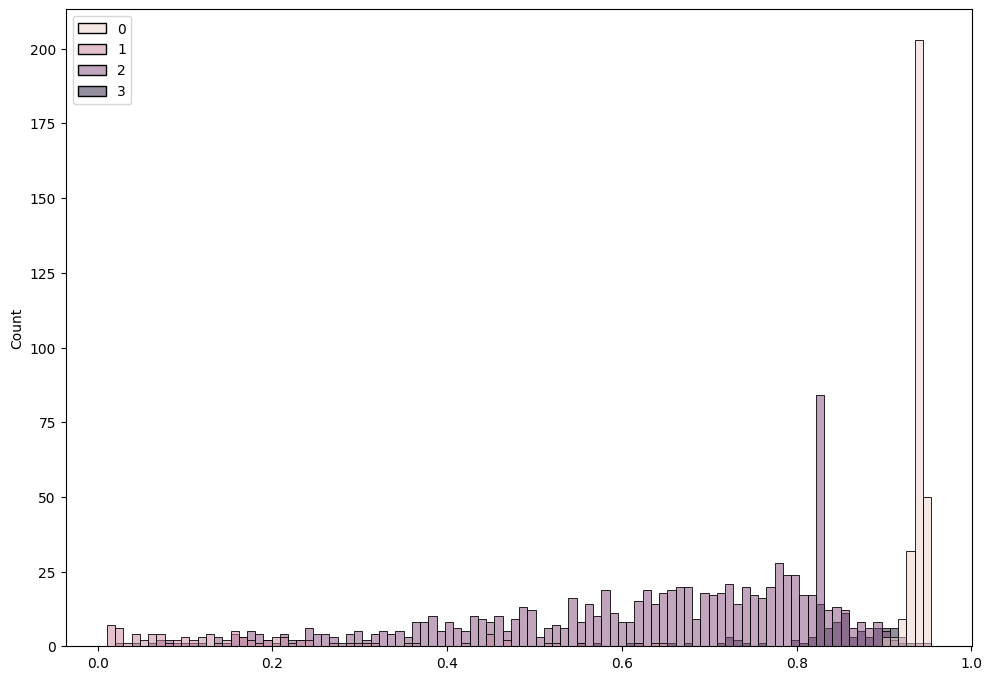

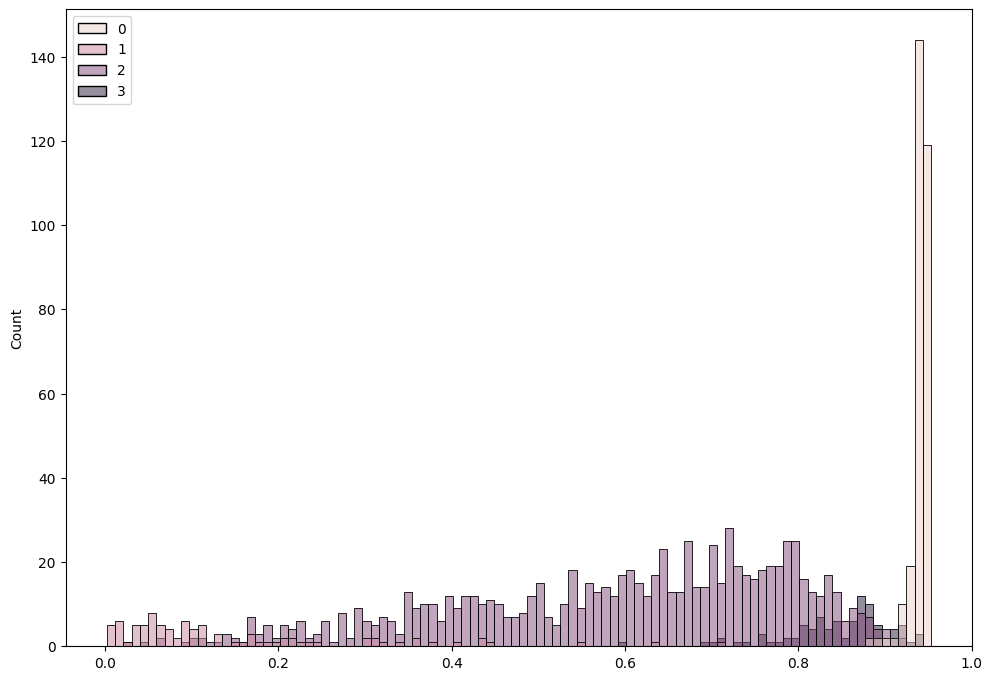

In [5]:
# Plot the conformity scores
rcParams['figure.figsize'] = 11.7,8.27

sns.histplot(x=scores_test_multi_step, hue=Y_test, bins=100)
plt.show()

sns.histplot(x=scores_test_twotest, hue=Y_test_part2, bins=100)
plt.show()